In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import data_processing as dp
from scipy import signal
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
import pywt
import os
import time
import h5py

In [2]:
for dirname, _, filenames in os.walk('.\data'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

.\data\G04_FoG_trial_1_emg.csv
.\data\G04_FoG_trial_2_emg.csv
.\data\G06_FoG_trial_1_emg.csv
.\data\G06_FoG_trial_2_emg.csv
.\data\G06_FoG_trial_3_emg.csv
.\data\G07_Freezing_Trial1_trial_1_emg.csv
.\data\G08_FoG_1_trial_1_emg.csv
.\data\G08_FoG_2_trial_1_emg.csv
.\data\G11_FoG_trial_1_emg.csv
.\data\G11_FoG_trial_2_emg.csv
.\data\P379_M050_2_OFF_A_FoG_trial_1_emg.csv
.\data\P379_M050_2_OFF_A_FoG_trial_2_emg.csv
.\data\P379_M050_2_OFF_A_FoG_trial_3_emg.csv
.\data\P379_M050_2_OFF_B_FoG_trial_1_emg.csv
.\data\P379_M050_2_OFF_B_FoG_trial_2_emg.csv
.\data\P379_M050_2_OFF_B_FoG_trial_3_emg.csv
.\data\P551_M050_2_A_FoG_trial_1_emg.csv
.\data\P551_M050_2_B_FoG_trial_1_emg.csv
.\data\P551_M050_2_B_FoG_trial_2_emg.csv
.\data\P812_M050_2_B_FoG_trial_1_emg.csv
.\data\P812_M050_2_B_FoG_trial_2_emg.csv
.\data\其他\labels.txt
.\data\其他\P812_M050_2_B_FoG_trial1_annotation.csv
.\data\其他\P812_M050_2_B_FoG_trials.mat
.\data\其他\P812_M050_2_B_FoG_trial_1_out_left_foot.csv
.\data\其他\P812_M050_2_B_FoG_trial_1

In [429]:
emg_data = pd.read_csv('.\data\P812_M050_2_B_FoG_trial_1_emg.csv')
#emg_data2 = pd.read_csv('.\data\正常\G03_Walking_trial_2_emg.csv')
path2 = '.\data\正常\G09_Walking_trial_6_emg.csv'
#emg_data3 = pd.read_csv(path)

In [718]:
path = './processed data/data_set_after_window_withoutSC.hdf5'
with h5py.File(path,'r') as f:
    x = f['cwt_data'][...]
    y = f['label2'][...]

In [44]:
#x,y = generate_window_slide_data(emg_data)
x2,y2 = generate_window_slide_data(emg_data2)

In [690]:
import imp
imp.reload(dp)

<module 'data_processing' from 'E:\\Document\\jupyter\\Master Thesis\\data_processing.py'>

In [775]:
width = 256
threshold_WAMP = 30
threshold_ZC = 1
threshold_SSC = 1
bins=9
bound = 70
HIST_range = (-bound,bound)

In [776]:
feature = dp.generate_feature(x,threshold_WAMP=threshold_WAMP,
                              threshold_ZC=threshold_ZC,
                              threshold_SSC=threshold_SSC,
                              bins=bins,ranges=HIST_range)
#feature2 = dp.generate_feature(x2)
player.Beep(1000,200)

threshold_WAMP:30.0, threshold_ZC:1.0, threshold_SSC:1.0,bins:9,ranges:(-70,70)
IEMG,MAV,SSI,VAR,RMS,WL,ZC,SSC,WAMP,skew,Acti,AR,HIST


1

In [768]:
sc = StandardScaler(with_mean=True)
feature_sc = sc.fit_transform(feature)

In [17]:
feature.min(axis=1)

array([-0.41013142, -0.48313451, -0.49410576, ..., -0.65115786,
       -0.75697845, -0.13526466])

In [777]:
feature2,y2 = dp.pipeline_feature(path2,width=256,scaler=False,
                                  threshold_WAMP=threshold_WAMP,
                                  threshold_ZC=threshold_ZC,
                                  threshold_SSC=threshold_SSC,
                                  bins=bins,ranges=HIST_range)
feature2_sc = sc.transform(feature2)

threshold_WAMP:30.0, threshold_ZC:1.0, threshold_SSC:1.0,bins:9,ranges:(-70,70)
IEMG,MAV,SSI,VAR,RMS,WL,ZC,SSC,WAMP,skew,Acti,AR,HIST


In [43]:
pca = PCA(n_components=60,copy=True,whiten=True)
feature_pca = pca.fit_transform(feature)
#feature2_pca = pca.transform(feature2)

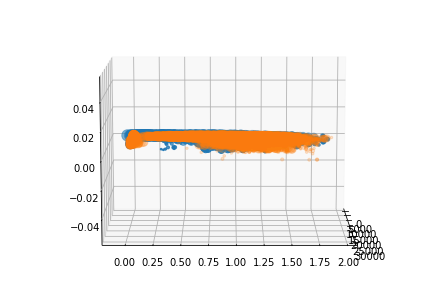

In [32]:
ind = ((y==4)|(y==1)|(y==2)|(y==3)|(y==6))
y_01 = y.copy()
y_01[ind] = 1
ind0 = y_01==0
ind1 = y_01==1
#plt.scatter(feature[ind0][:,42],feature[ind0][:,50])
#plt.scatter(feature[ind1][:,42],feature[ind1][:,50])
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(feature[ind0][:,42], feature[ind0][:,93], feature[ind0][:,50],marker='o')
plt.scatter(feature[ind1][:,42], feature[ind1][:,93], feature[ind1][:,50],alpha=0.2,marker='o')
ax.view_init(elev=10,azim=0)

In [469]:
x.max(axis=1)

array([[3.1680887, 3.5473368, 2.833147 , ..., 3.5971007, 3.1422873,
        2.681295 ],
       [2.4164464, 3.5161357, 3.0189595, ..., 3.6359956, 3.178391 ,
        2.6736798],
       [2.4330943, 3.3934205, 3.1654563, ..., 4.4193835, 3.1375792,
        2.588877 ],
       ...,
       [4.342047 , 4.8141947, 3.2393596, ..., 4.987775 , 3.1128116,
        3.1066031],
       [4.7452106, 4.4620094, 3.304755 , ..., 4.9901853, 2.977572 ,
        3.0100384],
       [6.000379 , 4.358333 , 3.277154 , ..., 4.4818225, 2.9674785,
        3.0071075]], dtype=float32)

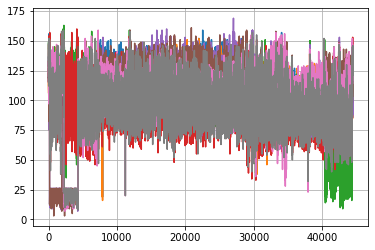

In [762]:
test=dp.compute_SSC(x,2)
#plt.figure(figsize=(32,24))
plt.plot(test)
plt.grid(True)

In [65]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

In [778]:
#ind = ((y==1)|(y==2)|(y==3)|(y==6))
ind = ((y==4)|(y==1)|(y==2)|(y==3)|(y==6))
ind_f = [0,1,6,42,46,57,62]
#y_01 = y[ind].copy()
#y_01[y_01==1]=0
#y_01[y_01==2]=1
#y_01[y_01==3]=2
#y_01[y_01==6]=3
y_01 = y.copy()
y_01[ind] = 1
oh_ec = OneHotEncoder()
y_oh = oh_ec.fit_transform(y_01[:,np.newaxis]).toarray()
x_full,x_test,y_full,y_test = train_test_split(feature,y_01,test_size=0.2,random_state=123)
x_train,x_valid,y_train,y_valid = train_test_split(x_full,y_full,test_size=0.2,random_state=555)
d_train = xgb.DMatrix(x_train,label=y_train)
d_valid = xgb.DMatrix(x_valid,label=y_valid)

In [21]:
param = {'max_depth': 5, 'eta': 0.3, 'gamma':0}
#param['nthread'] = 4
param['seed'] = 100
param['objective'] = 'binary:logistic'
#param['objectibe'] = 'multi:softmax'
#param['num_class'] = 4
param['lambda'] = 2
param['subsample'] = 0.8
evallist = [(d_train, 'train'), (d_valid, 'eval')]

model = xgb.train(param, d_train, 1000, evallist,early_stopping_rounds=30)
player.Beep(1000,200)

[0]	train-error:0.18021	eval-error:0.19251
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 30 rounds.
[1]	train-error:0.14321	eval-error:0.15503
[2]	train-error:0.13292	eval-error:0.14563
[3]	train-error:0.13186	eval-error:0.14239
[4]	train-error:0.12069	eval-error:0.12858
[5]	train-error:0.11238	eval-error:0.12065
[6]	train-error:0.10618	eval-error:0.11477
[7]	train-error:0.10162	eval-error:0.11389
[8]	train-error:0.09879	eval-error:0.11109
[9]	train-error:0.09369	eval-error:0.10963
[10]	train-error:0.09148	eval-error:0.10727
[11]	train-error:0.08983	eval-error:0.10478
[12]	train-error:0.08803	eval-error:0.10213
[13]	train-error:0.08670	eval-error:0.10066
[14]	train-error:0.08457	eval-error:0.09772
[15]	train-error:0.08358	eval-error:0.09728
[16]	train-error:0.08145	eval-error:0.09478
[17]	train-error:0.07899	eval-error:0.09376
[18]	train-error:0.07719	eval-error:0.09361
[19]	train-error:0.07605	eval

[182]	train-error:0.00037	eval-error:0.03644
[183]	train-error:0.00037	eval-error:0.03615
[184]	train-error:0.00040	eval-error:0.03615
[185]	train-error:0.00037	eval-error:0.03600
[186]	train-error:0.00029	eval-error:0.03630
[187]	train-error:0.00018	eval-error:0.03630
[188]	train-error:0.00018	eval-error:0.03615
[189]	train-error:0.00015	eval-error:0.03556
[190]	train-error:0.00015	eval-error:0.03600
[191]	train-error:0.00015	eval-error:0.03542
[192]	train-error:0.00015	eval-error:0.03512
[193]	train-error:0.00015	eval-error:0.03630
[194]	train-error:0.00015	eval-error:0.03644
[195]	train-error:0.00011	eval-error:0.03512
[196]	train-error:0.00015	eval-error:0.03439
[197]	train-error:0.00011	eval-error:0.03527
[198]	train-error:0.00011	eval-error:0.03571
[199]	train-error:0.00007	eval-error:0.03527
[200]	train-error:0.00007	eval-error:0.03468
[201]	train-error:0.00007	eval-error:0.03483
[202]	train-error:0.00007	eval-error:0.03468
[203]	train-error:0.00007	eval-error:0.03497
[204]	trai

1

In [779]:
model = xgb.XGBClassifier(max_depth=4, 
                          learning_rate=0.3, 
                          n_estimators=1000, 
                          silent=True, 
                          eval_metrics='error',
                          objective='binary:logistic', 
                          #objective='multi:softmax',
                          #num_calss=5,
                          seed=100,
#                          nthread=4,
                          sub_sabsample=0.8,
                          reg_lambda = 15,
                         )
eval_set=[(x_train,y_train),(x_valid,y_valid)]
model.fit(x_train, y_train,eval_metric=['error'],
          eval_set=eval_set,early_stopping_rounds=30)
player.Beep(1000,200)

[23:03:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { eval_metrics, silent, sub_sabsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.19278	validation_1-error:0.19116
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 30 rounds.
[1]	validation_0-error:0.18274	validation_1-error:0.18386
[2]	validation_0-error:0.17478	validation_1-error:0.17895
[3]	validation_0-error:0.15011	validation_1-error:0.15060
[4]	validation_0-error:0.14660	validation_1-error:0.14653
[5]	validation_0-error:0.14306	validation_1-error:0.14386
[6]	validation_0-error:0.14032	validation_1-error:0.14246
[7]	validation_0-err

[129]	validation_0-error:0.03165	validation_1-error:0.06133
[130]	validation_0-error:0.03123	validation_1-error:0.06119
[131]	validation_0-error:0.03077	validation_1-error:0.06105
[132]	validation_0-error:0.03074	validation_1-error:0.06021
[133]	validation_0-error:0.03032	validation_1-error:0.05979
[134]	validation_0-error:0.02990	validation_1-error:0.06077
[135]	validation_0-error:0.02972	validation_1-error:0.06077
[136]	validation_0-error:0.02926	validation_1-error:0.06133
[137]	validation_0-error:0.02895	validation_1-error:0.06147
[138]	validation_0-error:0.02853	validation_1-error:0.06161
[139]	validation_0-error:0.02846	validation_1-error:0.06091
[140]	validation_0-error:0.02842	validation_1-error:0.05979
[141]	validation_0-error:0.02811	validation_1-error:0.06021
[142]	validation_0-error:0.02818	validation_1-error:0.06021
[143]	validation_0-error:0.02779	validation_1-error:0.05979
[144]	validation_0-error:0.02723	validation_1-error:0.05937
[145]	validation_0-error:0.02709	validat

[266]	validation_0-error:0.00618	validation_1-error:0.04183
[267]	validation_0-error:0.00590	validation_1-error:0.04154
[268]	validation_0-error:0.00586	validation_1-error:0.04098
[269]	validation_0-error:0.00575	validation_1-error:0.04126
[270]	validation_0-error:0.00558	validation_1-error:0.04084
[271]	validation_0-error:0.00554	validation_1-error:0.04098
[272]	validation_0-error:0.00537	validation_1-error:0.04183
[273]	validation_0-error:0.00530	validation_1-error:0.04183
[274]	validation_0-error:0.00526	validation_1-error:0.04140
[275]	validation_0-error:0.00502	validation_1-error:0.04154
[276]	validation_0-error:0.00488	validation_1-error:0.04140
[277]	validation_0-error:0.00495	validation_1-error:0.04140
[278]	validation_0-error:0.00484	validation_1-error:0.04056
[279]	validation_0-error:0.00488	validation_1-error:0.04098
[280]	validation_0-error:0.00463	validation_1-error:0.04098
[281]	validation_0-error:0.00477	validation_1-error:0.04098
[282]	validation_0-error:0.00481	validat

[403]	validation_0-error:0.00070	validation_1-error:0.03312
[404]	validation_0-error:0.00070	validation_1-error:0.03340
[405]	validation_0-error:0.00070	validation_1-error:0.03354
[406]	validation_0-error:0.00067	validation_1-error:0.03326
[407]	validation_0-error:0.00067	validation_1-error:0.03284
[408]	validation_0-error:0.00063	validation_1-error:0.03284
[409]	validation_0-error:0.00067	validation_1-error:0.03270
[410]	validation_0-error:0.00056	validation_1-error:0.03228
[411]	validation_0-error:0.00060	validation_1-error:0.03228
[412]	validation_0-error:0.00063	validation_1-error:0.03242
[413]	validation_0-error:0.00053	validation_1-error:0.03256
[414]	validation_0-error:0.00053	validation_1-error:0.03228
[415]	validation_0-error:0.00056	validation_1-error:0.03242
[416]	validation_0-error:0.00053	validation_1-error:0.03158
[417]	validation_0-error:0.00056	validation_1-error:0.03186
[418]	validation_0-error:0.00056	validation_1-error:0.03186
[419]	validation_0-error:0.00046	validat

1

In [344]:
y_test.shape

(8891,)

In [780]:
y_pred=model.predict(x_test)
test = metrics.accuracy_score(y_test,y_pred>0.5)
y_pred=model.predict(x_valid)
valid = metrics.accuracy_score(y_valid,y_pred>0.5)
print('test:%f'%test)
print('valid:%f'%valid)

test:0.966652
valid:0.969263


In [781]:
y_pred=model.predict(feature[41872:])
metrics.accuracy_score(y_01[41872:],y_pred>0.5)

0.9811888638073739

In [70]:
metrics.confusion_matrix(y_valid,y_pred)
#metrics.precision_recall_curve(y_valid,y_pred)
#(y_valid==0).sum()

array([[1270,   61,    0,   30],
       [  36, 1987,    0,   15],
       [   4,   19,  110,    0],
       [  25,   12,    0, 1046]], dtype=int64)

In [191]:
ind = ((y_test==1)|(y_test==2)|(y_test==3)|(y_test==4)|(y_test==6))
#ind = ((y2==1)|(y2==2)|(y2==3)|(y2==4)|(y2==6))
y_01 = y_test
y_01[ind] = 1
#d_test = xgb.DMatrix(feature2,label=y_01)

In [782]:
y_pred=model.predict(feature2)
metrics.accuracy_score(y2,y_pred>0.5)

0.8558421851289834

In [339]:
set(y2)

{0}

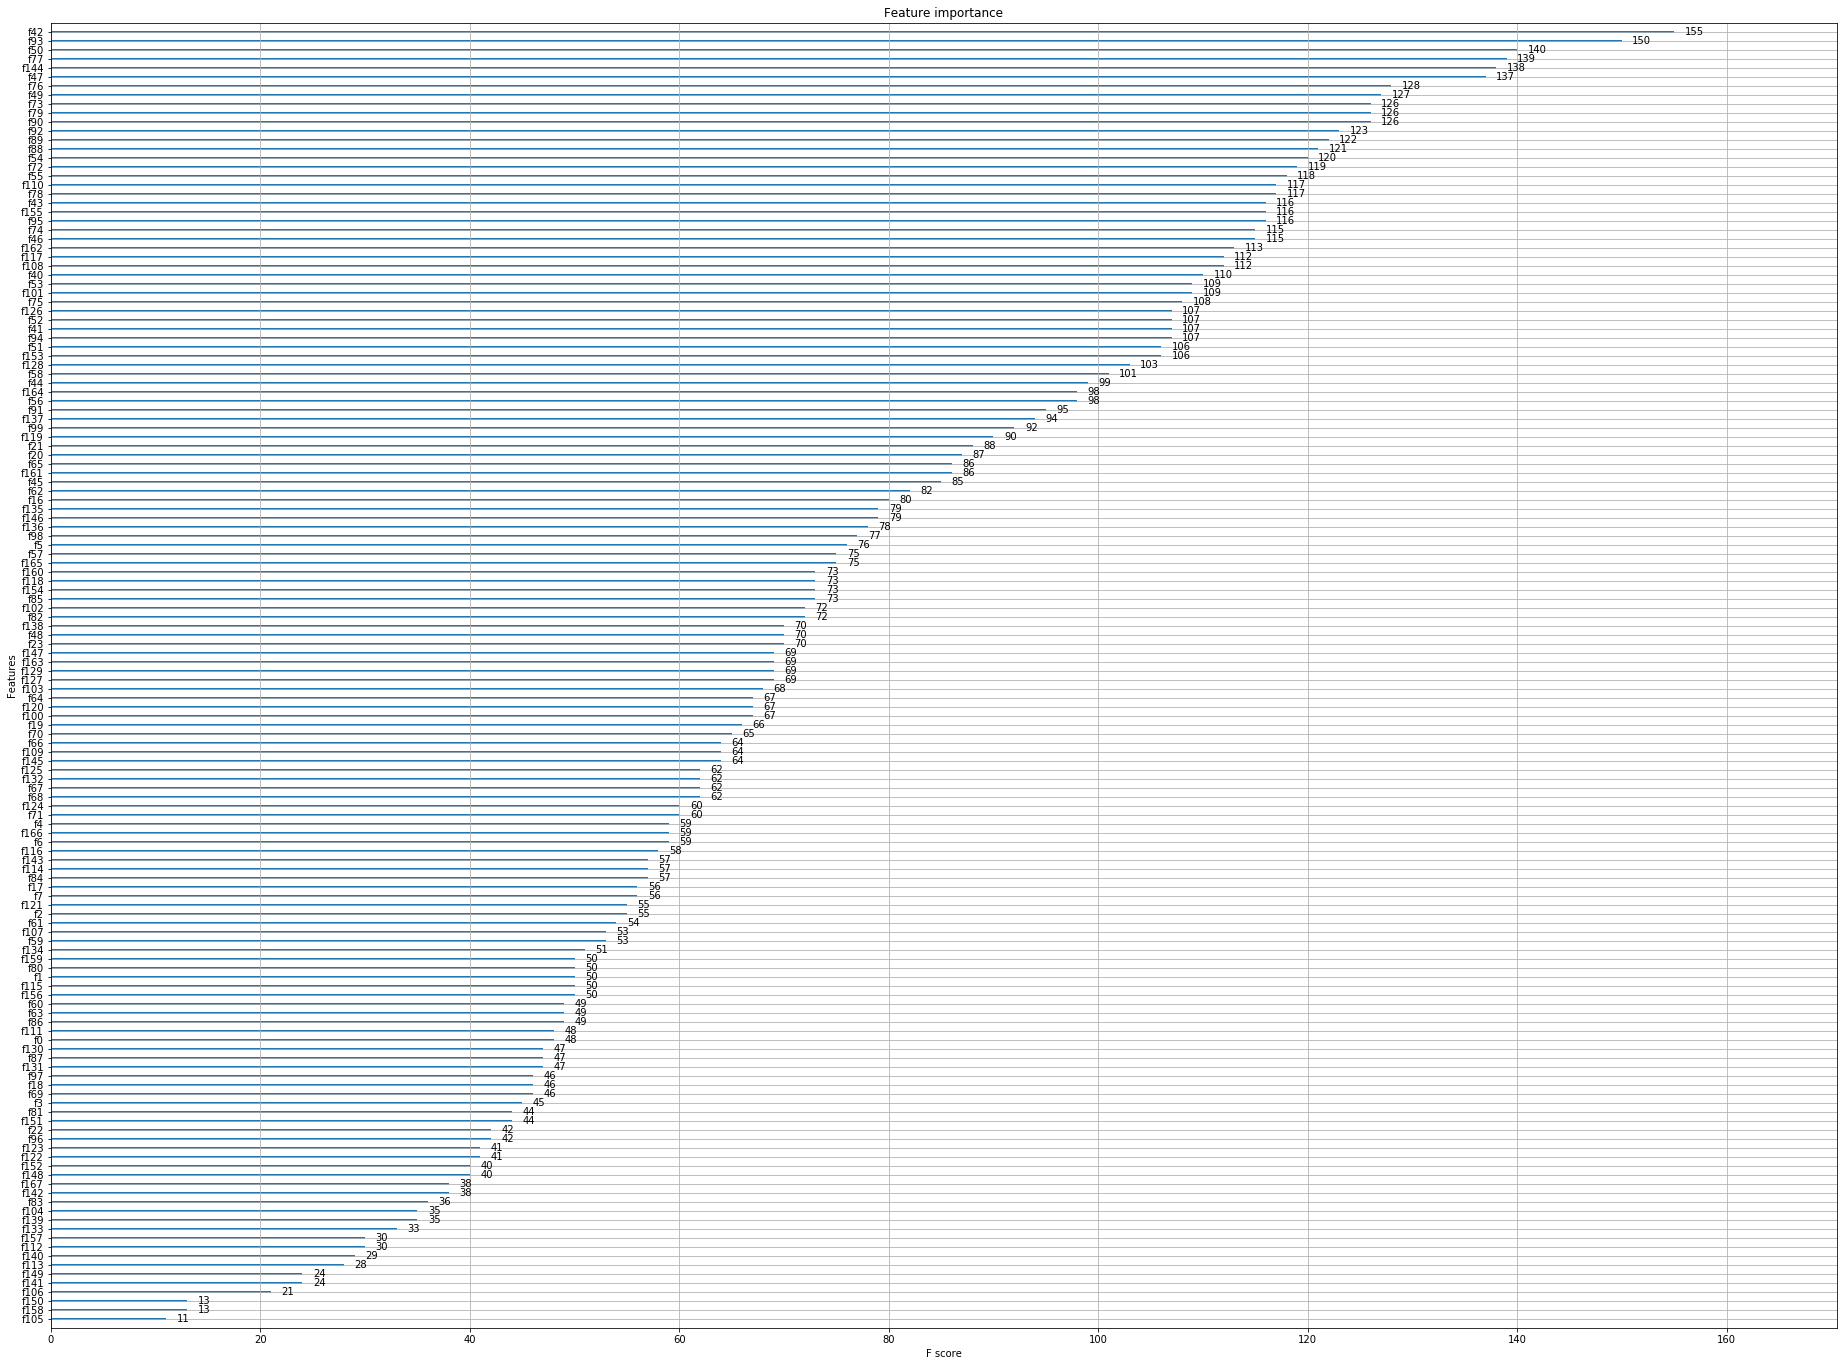

In [515]:
plt.rcParams["figure.figsize"] = (32,24)
plot_importance(model)
plt.show()

In [593]:
y_02[200]

1

(array([  5.,  16., 202.,  32.,   1.]),
 array([-5., -3., -1.,  1.,  3.,  5.], dtype=float32),
 <a list of 5 Patch objects>)

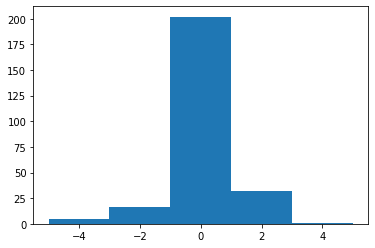

In [648]:
plt.hist(x[1000,:,1],bins=bins,range=HIST_range)

In [15]:
import ctypes
player = ctypes.windll.kernel32
player.Beep(1000,200)

1

In [7]:
feature.mean(axis=1)

array([1820.74390164, 1794.98282657, 1366.77049128, ..., 3368.58514734,
       3150.73227432, 2575.55319812])

In [444]:
feature_sc[200,90:150]

array([ 2.65791323e+00,  7.95181939e-01,  1.11527608e-03, -1.24040032e-02,
        4.48318099e+00,  2.85782881e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.11327650e-01,  3.67817467e+00,  1.56499076e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.92075511e-01,  7.49300705e-01,  3.11740075e-01,  3.60821098e+00,
        7.12848340e-01,  5.84933044e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  9.94618165e-01,
        2.74932611e+00,  4.39620376e+00,  3.41983363e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.07560407e-01,  4.30592149e+00,  7.49695691e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.62577031e-01,
        3.43855072e-01,  1.73382473e-01,  3.45234429e+00,  6.02006660e-02,
        1.21320276e-01,  0.00000000e+00,  0.00000000e+00,  2.73882403e-01,
        0.00000000e+00,  

In [82]:
path

'./processed data/data_set_after_window_withoutSC.hdf5'